# K-Nearest Neighbors Project - DDOS Attack Network Logs  
*By: Aaminah Arif - 100061200 and Sahlah Adesina - 100061415*

The **DDOS Attack Network Logs** contains approximately 2.1 million labeled network log entries, documenting various types of network traffic and attacks. 


Using a short version of the dataset, KNN will be applied to predict network traffic and potential DDOS attacks through the following steps:

1. Explaining the Model  
2. Describing the Data  
3. Arranging Data  
4. Training the model 

In [153]:
import numpy as np
np.random.default_rng
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1: Explain the Model

**Model Overview**

Our model is a K-Nearest Neighbors (KNN) classifier designed to predict network traffic as either a 'Threat' or 'Normal' based on based on features such as packet size, delay, rate, and network node info.

**Number of Features**  

The model consists of 27 features, including:

1. **Packet metadata** (e.g. source/destination address, packet ID, sequence number, flags)  
2. **Network behavior attributes** (e.g. packet size, packet rate, delay, utilization, throughput)  
3. **Node-level communication** (e.g. sender and receiver nodes, incoming/outgoing packets)  
4. **Timing information** (e.g. send time, receive time, delay per node, first and last packet timestamps)

The target variable **(Y)** is PKT_CLASS, a multi-class outcome with the following labels:
- Normal
- UDP-Flood
- Smurf
- SIDDOS
- HTTP-FLOOD

For our task we will convert the target variable into a binary class:
- 1 (Threat) – Network traffic indicates a DDOS attack
- 0 (Normal) – Network traffic is normal



**Mathematical Model**

K-Nearest Neighbors (KNN) is a algorithm used to classify data points based on their distance to other points in the dataset.

To predict the label of a point x we use the following steps: 

1. Measure the distance between a point x and every other point in the training set. Usually the Euclidean distance metrics is used which has the following formula:
   $$
   d(x, x_i) = \sqrt{\sum_{j=1}^{n} (x_j - x_{i,j})^2}
   $$

   Where:
   - \( x \) is the input vector to classify.
   - \( x_i \) is a point in the training set.
   - \( n \) is the number of features (dimensions).
   - \( x_j \) is the j-th feature of \( x \).


2. Decide on how many neighbors to consider
3. Find the points in the training set that are closest to the point x
4. Assigns the most common class label among those neighbors to the new data point.

**Objective:**  

By training the model we aim to determine the optimal number of nearest neighbors (k) that minimize the error rate and improve the classification accuracy of network traffic.


## Task 2: Description of the Data

In the following section we gain a better understanding of the data.
We check the dataset for the following:
1. Null Values - No null values were present in the dataset

In [154]:
# Loading the dataframe from the sample created
df = pd.read_csv('sample.csv')
df

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FLAGS,FID,SEQ_NUMBER,...,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED,PKT_CLASS
0,24.11,11.00,13072.0,23.0,22.0,b'ack',55.0,b'-------',12.0,408.0,...,328.522947,18068.8,55.0,0.008446,0.000000,2.441154,2.471163,1.030019,50.046382,b'Normal'
1,2.00,24.20,183804.0,2.0,21.0,b'tcp',1540.0,b'-------',3.0,5742.0,...,328.264040,505526.0,1540.0,0.236321,0.000000,18.518848,18.549218,1.000000,50.018467,b'Normal'
2,15.00,24.15,555513.0,23.0,24.0,b'tcp',1540.0,b'-------',16.0,15511.0,...,328.205808,505437.0,1540.0,0.236337,0.000000,48.238006,48.268376,1.000000,50.030211,b'Normal'
3,1.20,24.43,25407.0,21.0,23.0,b'cbr',1500.0,b'-------',22.0,976.0,...,1016.542930,1524810.0,1500.0,0.130291,0.035400,24.698286,24.733686,1.000000,9.959779,b'UDP-Flood'
4,3.10,24.23,584008.0,23.0,24.0,b'cbr',1000.0,b'-------',24.0,3391.0,...,124.943226,124943.0,1000.0,0.059605,0.000480,52.128000,52.158720,25.000000,75.022720,b'Normal'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12.20,24.54,28012.0,22.0,23.0,b'cbr',1192.0,b'-------',33.0,1019.0,...,962.684973,1147520.0,1192.0,0.098389,0.080400,27.071000,27.151400,1.000000,9.990480,b'UDP-Flood'
996,9.00,24.90,401943.0,9.0,21.0,b'tcp',1540.0,b'-------',10.0,11641.0,...,328.063862,505218.0,1540.0,0.236234,0.000216,36.458983,36.489568,1.000000,50.030088,b'Normal'
997,4.00,24.40,380982.0,4.0,21.0,b'tcp',1540.0,b'-------',5.0,11116.0,...,328.217832,505455.0,1540.0,0.236321,0.000038,34.851202,34.881609,1.000000,50.025368,b'Normal'
998,6.00,24.60,479552.0,21.0,23.0,b'tcp',1540.0,b'-------',7.0,13600.0,...,328.192835,505416.0,1540.0,0.236321,0.000104,42.412395,42.442869,1.000000,50.029102,b'Normal'


In [155]:
# To see the data types and null values
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SRC_ADD           1000 non-null   float64
 1   DES_ADD           1000 non-null   float64
 2   PKT_ID            1000 non-null   float64
 3   FROM_NODE         1000 non-null   float64
 4   TO_NODE           1000 non-null   float64
 5   PKT_TYPE          1000 non-null   object 
 6   PKT_SIZE          1000 non-null   float64
 7   FLAGS             1000 non-null   object 
 8   FID               1000 non-null   float64
 9   SEQ_NUMBER        1000 non-null   float64
 10  NUMBER_OF_PKT     1000 non-null   float64
 11  NUMBER_OF_BYTE    1000 non-null   float64
 12  NODE_NAME_FROM    1000 non-null   object 
 13  NODE_NAME_TO      1000 non-null   object 
 14  PKT_IN            1000 non-null   float64
 15  PKT_OUT           1000 non-null   float64
 16  PKT_R             1000 non-null   float64
 

In [156]:
# Print all the data types 
df.dtypes

SRC_ADD             float64
DES_ADD             float64
PKT_ID              float64
FROM_NODE           float64
TO_NODE             float64
PKT_TYPE             object
PKT_SIZE            float64
FLAGS                object
FID                 float64
SEQ_NUMBER          float64
NUMBER_OF_PKT       float64
NUMBER_OF_BYTE      float64
NODE_NAME_FROM       object
NODE_NAME_TO         object
PKT_IN              float64
PKT_OUT             float64
PKT_R               float64
PKT_DELAY_NODE      float64
PKT_RATE            float64
BYTE_RATE           float64
PKT_AVG_SIZE        float64
UTILIZATION         float64
PKT_DELAY           float64
PKT_SEND_TIME       float64
PKT_RESEVED_TIME    float64
FIRST_PKT_SENT      float64
LAST_PKT_RESEVED    float64
PKT_CLASS            object
dtype: object

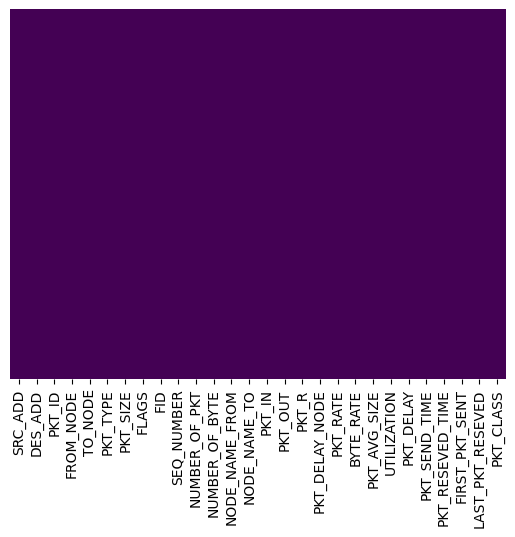

In [157]:
# Plotting the null values using a heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [158]:
df.isna().sum()

SRC_ADD             0
DES_ADD             0
PKT_ID              0
FROM_NODE           0
TO_NODE             0
PKT_TYPE            0
PKT_SIZE            0
FLAGS               0
FID                 0
SEQ_NUMBER          0
NUMBER_OF_PKT       0
NUMBER_OF_BYTE      0
NODE_NAME_FROM      0
NODE_NAME_TO        0
PKT_IN              0
PKT_OUT             0
PKT_R               0
PKT_DELAY_NODE      0
PKT_RATE            0
BYTE_RATE           0
PKT_AVG_SIZE        0
UTILIZATION         0
PKT_DELAY           0
PKT_SEND_TIME       0
PKT_RESEVED_TIME    0
FIRST_PKT_SENT      0
LAST_PKT_RESEVED    0
PKT_CLASS           0
dtype: int64

We see that there are no NaN values in the dataset, which is great. 

In [159]:
# view summary statistics in numerical variables
print(round(df.describe(),2))


       SRC_ADD  DES_ADD     PKT_ID  FROM_NODE  TO_NODE  PKT_SIZE      FID  \
count  1000.00  1000.00    1000.00    1000.00  1000.00   1000.00  1000.00   
mean     14.34    18.59  301355.65      19.63    20.93   1132.84    14.47   
std       8.58     8.50  196628.47       6.18     5.20   3808.50    11.26   
min       0.00     0.00      37.00       0.00     0.00     55.00     0.00   
25%       7.00    11.00  115837.00      21.00    21.00     55.00     5.00   
50%      14.00    24.14  296214.00      22.00    23.00   1000.00    12.00   
75%      24.12    24.38  474218.75      23.00    23.00   1540.00    22.00   
max      26.00    26.00  640354.00      26.00    26.00  65535.00    40.00   

       SEQ_NUMBER  NUMBER_OF_PKT  NUMBER_OF_BYTE  ...  PKT_DELAY_NODE  \
count     1000.00        1000.00         1000.00  ...         1000.00   
mean     15084.16       13223.36     11570193.06  ...            0.00   
std     124514.17        4455.75     10510216.64  ...            0.01   
min         -1

From the summary statistics, we can see that the data is not normally distributed. We can use the skewness and kurtosis to check for normality.  

**Skewness**:   
The skewness of a normal distribution is 0. A positive value indicates that the tail on the right side is longer or fatter than the left side. A negative value indicates that the tail on the left side is longer or fatter than the right side.   

**Kurtosis**:   
The kurtosis of a normal distribution is 3. A positive value indicates that the distribution is more peaked than a normal distribution, while a negative value indicates that the distribution is flatter than a normal distribution.

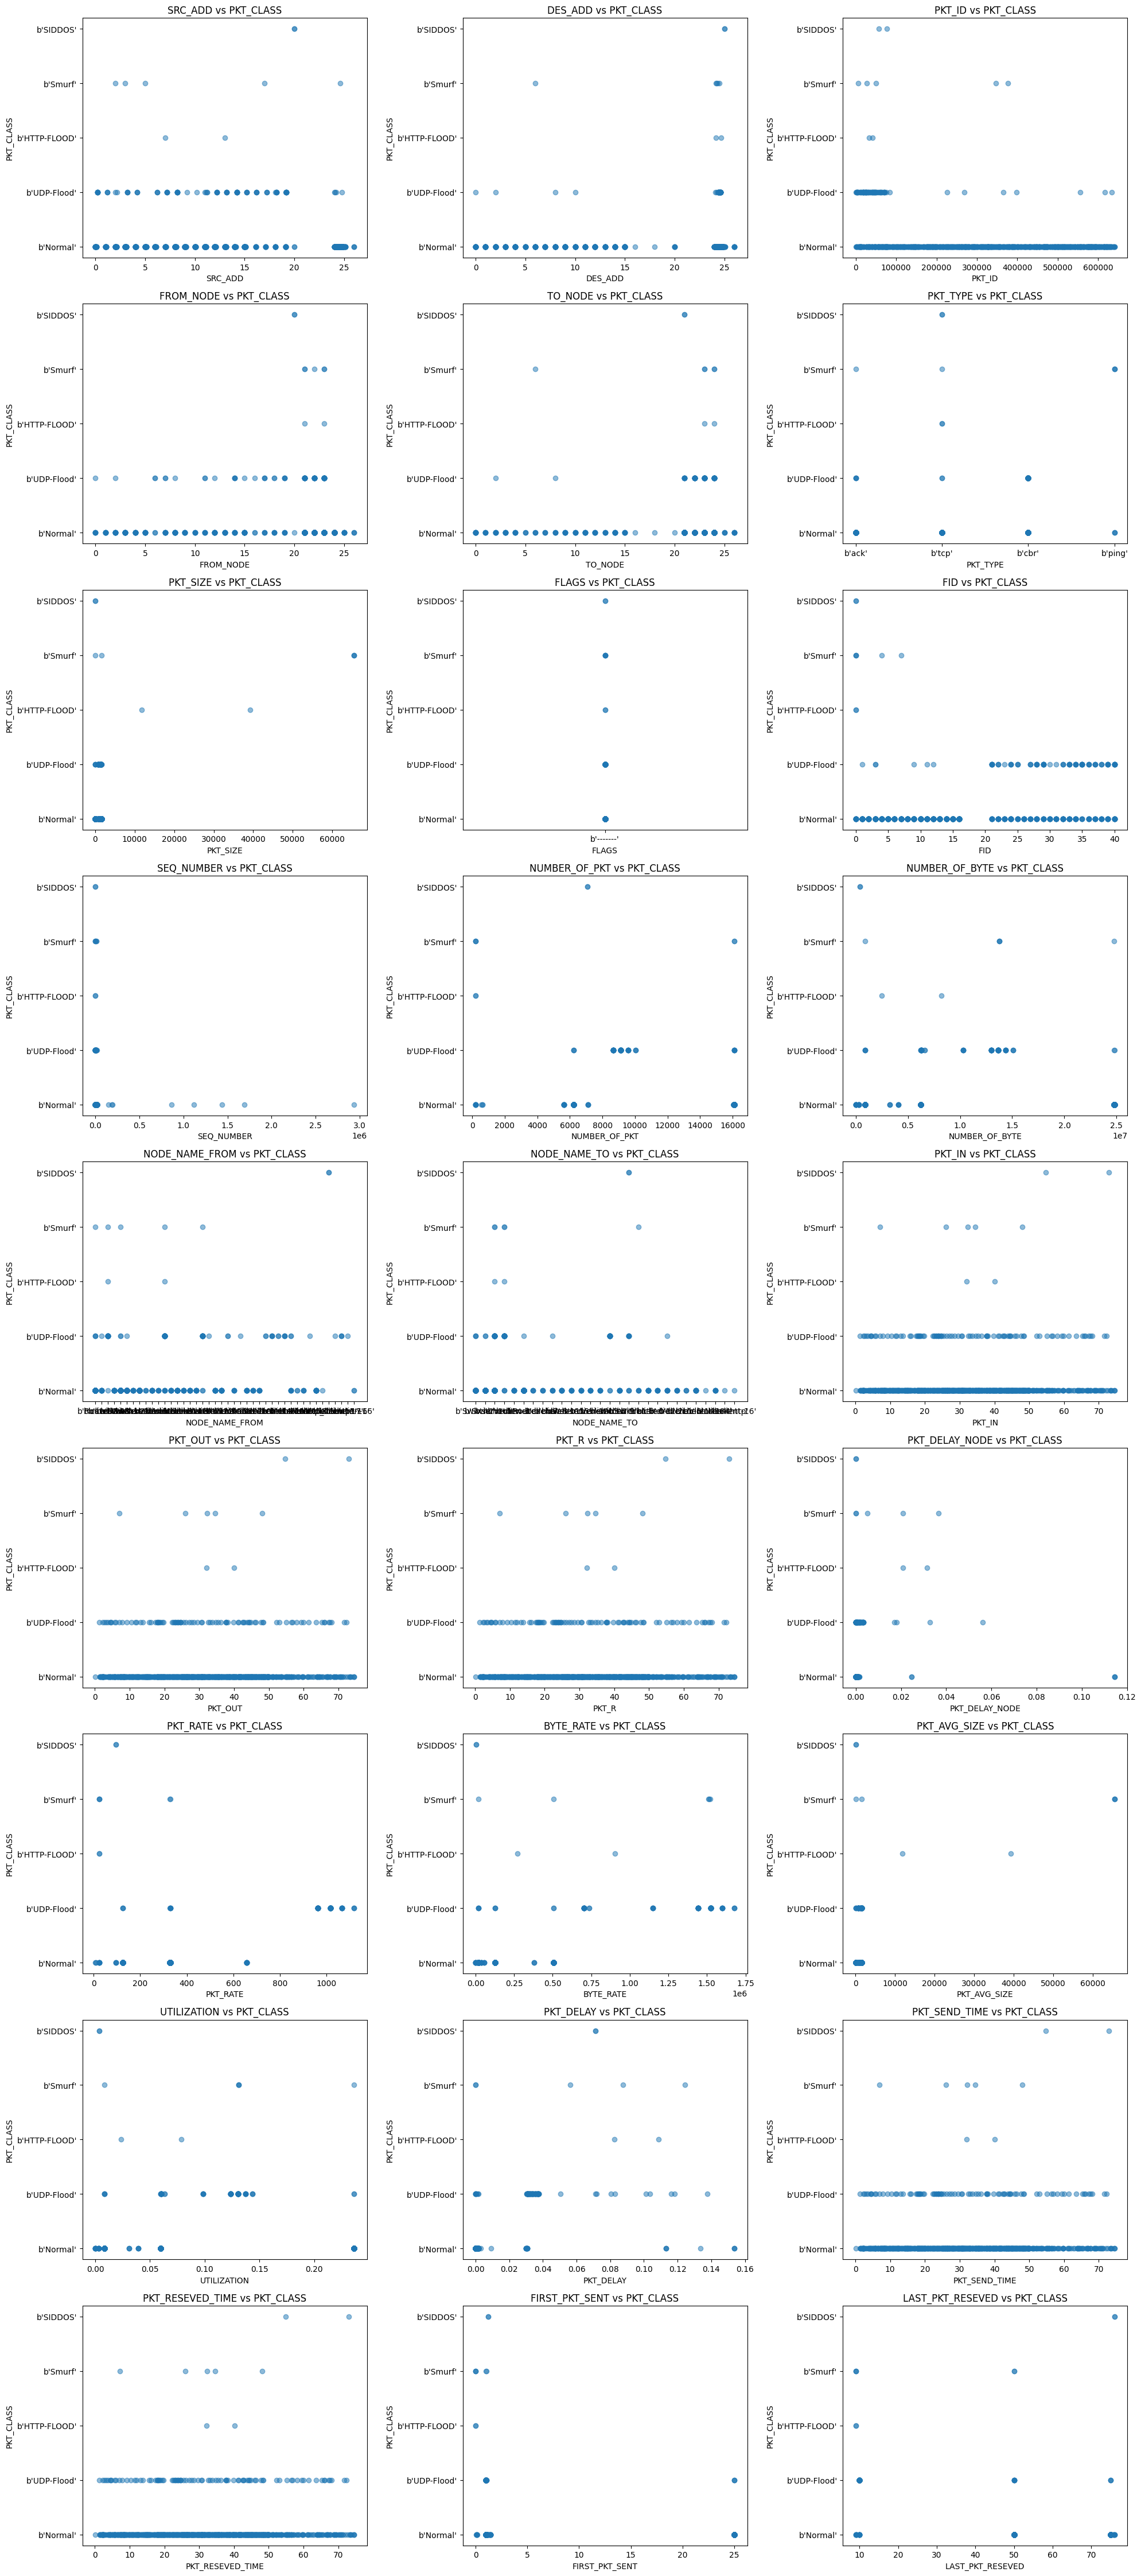

In [160]:
#scatter plot to see the distribution of the target variable with respect to the features
# Define our features and target
features = [col for col in df.columns if col != 'PKT_CLASS']
target = 'PKT_CLASS'

# Calculate the grid layout - 3 columns and enough rows
n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols  

# Create our figure with appropriate size
plt.figure(figsize=(20, 5*n_rows))  # Width 20, height 5 per row

# Ploting each feature against target
for i, feature in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.scatter(df[feature], df[target], alpha=0.5)  # Using plt.scatter directly
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)

plt.tight_layout()  # Adjust spacing between plots
plt.show()



## Task 3: Arranging the Data

We notice that some features were saved as float when they were imported instead of being saved as an integer. 

These will be changed below:

In [161]:
# Converting float to integer
float_columns = df.select_dtypes(include=['float64']).columns
df[float_columns] = df[float_columns].astype(int)

In [162]:
df

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FLAGS,FID,SEQ_NUMBER,...,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED,PKT_CLASS
0,24,11,13072,23,22,b'ack',55,b'-------',12,408,...,328,18068,55,0,0,2,2,1,50,b'Normal'
1,2,24,183804,2,21,b'tcp',1540,b'-------',3,5742,...,328,505526,1540,0,0,18,18,1,50,b'Normal'
2,15,24,555513,23,24,b'tcp',1540,b'-------',16,15511,...,328,505437,1540,0,0,48,48,1,50,b'Normal'
3,1,24,25407,21,23,b'cbr',1500,b'-------',22,976,...,1016,1524810,1500,0,0,24,24,1,9,b'UDP-Flood'
4,3,24,584008,23,24,b'cbr',1000,b'-------',24,3391,...,124,124943,1000,0,0,52,52,25,75,b'Normal'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,24,28012,22,23,b'cbr',1192,b'-------',33,1019,...,962,1147520,1192,0,0,27,27,1,9,b'UDP-Flood'
996,9,24,401943,9,21,b'tcp',1540,b'-------',10,11641,...,328,505218,1540,0,0,36,36,1,50,b'Normal'
997,4,24,380982,4,21,b'tcp',1540,b'-------',5,11116,...,328,505455,1540,0,0,34,34,1,50,b'Normal'
998,6,24,479552,21,23,b'tcp',1540,b'-------',7,13600,...,328,505416,1540,0,0,42,42,1,50,b'Normal'


In [163]:
# Check for features that are not numerical

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 5 categorical variables

The categorical variables are : ['PKT_TYPE', 'FLAGS', 'NODE_NAME_FROM', 'NODE_NAME_TO', 'PKT_CLASS']


In [164]:
# Selecting columns with object data type 
df.select_dtypes(include=['object']).head(5)

,PKT_TYPE,FLAGS,NODE_NAME_FROM,NODE_NAME_TO,PKT_CLASS
0,b'ack',b'-------',b'Router',b'Switch2',b'Normal'
1,b'tcp',b'-------',b'clien-2',b'Switch1',b'Normal'
2,b'tcp',b'-------',b'Router',b'server1',b'Normal'
3,b'cbr',b'-------',b'switch1',b'router',b'UDP-Flood'
4,b'cbr',b'-------',b'Router',b'server1',b'Normal'


#### Summary of the Categorical Variables

- **PKT_TYPE:** Represents the type of packet protocol or service.  

- **FLAGS:** Indicates the presence of certain TCP flags in the packet.  
    - This column will be dropped

- **NODE_NAME_FROM:** Identifies the source node or device name that sent the packet.  

- **NODE_NAME_TO:** Identifies the destination node or device that received the packet.  

- **PKT_CLASS:** The class or label assigned to each packet. This is the **target variable**.  

*We notice that all the object columns seem to be catgorical and threfore can be encoded.* 

##### Step 1: Dropping the **Flags** column as it does not seem to have proper data.

In [165]:
# For each categorical column, print the unique values and their counts
for col in df.select_dtypes(include=['object']).columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print()

Column: PKT_TYPE
PKT_TYPE
b'tcp'     385
b'ack'     334
b'cbr'     275
b'ping'      6
Name: count, dtype: int64

Column: FLAGS
FLAGS
b'-------'    1000
Name: count, dtype: int64

Column: NODE_NAME_FROM
NODE_NAME_FROM
b'Router'             299
b'Switch1'            165
b'Switch2'            131
b'server1'            105
b'router'              36
b'clien-3'             21
b'switch2'             19
b'switch1'             18
b'clien-8'             16
b'clien-15'            16
b'clien-2'             13
b'clien-4'             13
b'clien-12'            13
b'clien-5'             12
b'clien-13'            11
b'clien-7'             10
b'clien-9'              9
b'clien-14'             9
b'webcache'             9
b'clien-1'              9
b'clien-11'             8
b'clien-10'             6
b'clien-0'              6
b'clien-19'             5
b'clien-18'             5
b'client-14'            4
b'clien-17'             4
b'client-19'            4
b'client-17'            3
b'webserverlistin'      3
b'c

In [166]:
# We will drop the Flags column as it is not useful for our analysis
df.drop(columns=['FLAGS'], inplace=True)

#### Step 2: Encoding the column **PKT_TYPE**

In [167]:
# Getting how many unique values PKT_TYPE has
df['PKT_TYPE'].value_counts().unique

<bound method Series.unique of PKT_TYPE
b'tcp'     385
b'ack'     334
b'cbr'     275
b'ping'      6
Name: count, dtype: int64>

In [168]:
# One-hot encoding the column and adding it to the df
pkt_type_encoded = pd.get_dummies(df['PKT_TYPE'])
df = df.drop('PKT_TYPE', axis=1)
df = pd.concat([df, pkt_type_encoded], axis=1)

#### Step 3: Encoding the **NODE_NAME_TO** column

The column **NODE_NAME_TO**  is also categorical but it has many unique values.
- If we encode this column it will create too many new features, so instead we will replace instances having a count of less than 50 with a single category called 'other node_name_to'

- Then we will apply encoding as the number of features will be reduced

In [169]:
df['NODE_NAME_TO'].value_counts().unique

<bound method Series.unique of NODE_NAME_TO
b'Router'             287
b'server1'            214
b'Switch1'            197
b'Switch2'            109
b'router'              37
b'switch2'             18
b'switch1'             11
b'clien-0'             11
b'clien-14'            10
b'clien-11'             9
b'clien-3'              9
b'clien-9'              8
b'clien-2'              8
b'clien-15'             7
b'webserverlistin'      7
b'clien-10'             7
b'clien-4'              7
b'clien-12'             7
b'clien-8'              6
b'clien-13'             6
b'clien-1'              6
b'clien-6'              5
b'webcache'             4
b'clien-7'              4
b'clien-5'              3
b'client-18'            1
b'clienthttp'           1
b'client-16'            1
Name: count, dtype: int64>

In [170]:
# Replace rare categories with 'Other'
count = df['NODE_NAME_TO'].value_counts()
for category in count.index:
    if count[category] <=50:
        category_name = 'other node_name_to'
        df.loc[df['NODE_NAME_TO'] == category, 'NODE_NAME_TO'] = category_name

In [171]:
# Checking the updated count 
df['NODE_NAME_TO'].value_counts().unique

<bound method Series.unique of NODE_NAME_TO
b'Router'             287
b'server1'            214
b'Switch1'            197
other node_name_to    193
b'Switch2'            109
Name: count, dtype: int64>

In [172]:
# One-hot encoding the column
node_name_to_encoded = pd.get_dummies(df['NODE_NAME_TO'])
df = df.drop('NODE_NAME_TO', axis=1)
df = pd.concat([df, node_name_to_encoded], axis=1)

#### Step 4: Encoding the **NODE_NAME_FROM** column

The column **NODE_NAME_FROM**  is also categorical but it has many unique values.
- If we encode this column it will create too many new features, so instead we will replace instances having a count of less than 50 with a single category called 'other node_name_from'

- Then we will apply encoding as the number of features will be reduced

In [173]:
df['NODE_NAME_FROM'].value_counts().unique

<bound method Series.unique of NODE_NAME_FROM
b'Router'             299
b'Switch1'            165
b'Switch2'            131
b'server1'            105
b'router'              36
b'clien-3'             21
b'switch2'             19
b'switch1'             18
b'clien-8'             16
b'clien-15'            16
b'clien-2'             13
b'clien-4'             13
b'clien-12'            13
b'clien-5'             12
b'clien-13'            11
b'clien-7'             10
b'clien-9'              9
b'clien-14'             9
b'webcache'             9
b'clien-1'              9
b'clien-11'             8
b'clien-10'             6
b'clien-0'              6
b'clien-19'             5
b'clien-18'             5
b'client-14'            4
b'clien-17'             4
b'client-19'            4
b'client-17'            3
b'webserverlistin'      3
b'clien-6'              2
b'clienthttp'           2
b'client-18'            2
b'client-7'             2
b'client-6'             2
b'clien-16'             2
b'client-8'       

In [174]:
# Replace rare categories with 'Other'
count = df['NODE_NAME_FROM'].value_counts()
for category in count.index:
    if count[category] <=50:
        category_name = 'other node_name_from'
        df.loc[df['NODE_NAME_FROM'] == category, 'NODE_NAME_FROM'] = category_name

In [175]:
# Checking the updated count 
df['NODE_NAME_FROM'].value_counts().unique

<bound method Series.unique of NODE_NAME_FROM
other node_name_from    300
b'Router'               299
b'Switch1'              165
b'Switch2'              131
b'server1'              105
Name: count, dtype: int64>

In [176]:
# One-hot encoding the column
node_name_from_encoded = pd.get_dummies(df['NODE_NAME_FROM'])
df = df.drop('NODE_NAME_FROM', axis=1)
df = pd.concat([df, node_name_from_encoded], axis=1)

In [177]:
# Viewing the updated df
df

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_SIZE,FID,SEQ_NUMBER,NUMBER_OF_PKT,NUMBER_OF_BYTE,...,b'Router',b'Switch1',b'Switch2',b'server1',other node_name_to,b'Router',b'Switch1',b'Switch2',b'server1',other node_name_from
0,24,11,13072,23,22,55,12,408,16103,885665,...,False,False,True,False,False,True,False,False,False,False
1,2,24,183804,2,21,1540,3,5742,16091,24780100,...,False,True,False,False,False,False,False,False,False,True
2,15,24,555513,23,24,1540,16,15511,16092,24781700,...,False,False,False,True,False,True,False,False,False,False
3,1,24,25407,21,23,1500,22,976,9108,13662000,...,False,False,False,False,True,False,False,False,False,True
4,3,24,584008,23,24,1000,24,3391,6250,6250000,...,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,24,28012,22,23,1192,33,1019,8655,10316800,...,False,False,False,False,True,False,False,False,False,True
996,9,24,401943,9,21,1540,10,11641,16085,24770900,...,False,True,False,False,False,False,False,False,False,True
997,4,24,380982,4,21,1540,5,11116,16091,24780100,...,False,True,False,False,False,False,False,False,False,True
998,6,24,479552,21,23,1540,7,13600,16091,24780100,...,True,False,False,False,False,False,True,False,False,False


#### Step 5: Converting the **multi-class** outcome to **binary-class**
Our target class is a multi-class outcome, however we will be converting this to a binary-class outcome. 

There are a total of 5 classes in **PKT_CLASS**. One class represents normal network traffic, while the others represent a threat. 

- We will represent the Normal network traffic as **0**

- We will group the Threat classes into one single class represented as **1**

In [178]:
# Viewing the PKT_CLASS 
df['PKT_CLASS']

0         b'Normal'
1         b'Normal'
2         b'Normal'
3      b'UDP-Flood'
4         b'Normal'
           ...     
995    b'UDP-Flood'
996       b'Normal'
997       b'Normal'
998       b'Normal'
999       b'Normal'
Name: PKT_CLASS, Length: 1000, dtype: object

In [179]:
# Classifying anything with the label "b'Normal'" as normal (0).
# Everything else is classified as a threat (1). 
type = []
for i in df['PKT_CLASS']:
    if i != "b'Normal'":
        type.append(1)
    else:
        type.append(0)

df['PKT_CLASS'] = type


In [180]:
# Viewing updated PKT_CLASS
df['PKT_CLASS']

0      0
1      0
2      0
3      1
4      0
      ..
995    1
996    0
997    0
998    0
999    0
Name: PKT_CLASS, Length: 1000, dtype: int64

Text(0.5, 1.0, 'Distribution of Network Traffic Classes')

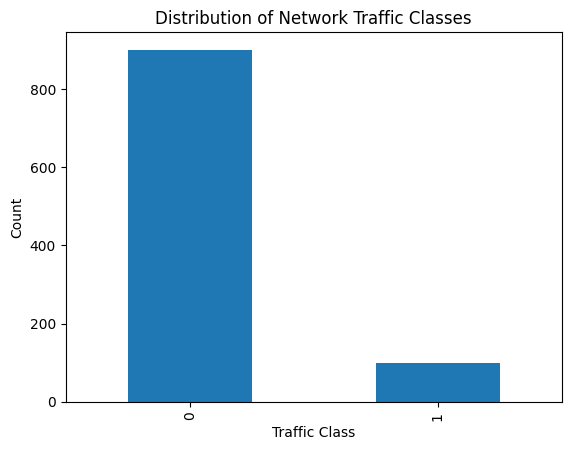

In [181]:
df['PKT_CLASS'].value_counts().plot(kind='bar')
plt.ylabel("Count")
plt.xlabel("Traffic Class")
plt.title("Distribution of Network Traffic Classes")

We notice that there is a great class imbalance with Normal packets being more than 90% of the classes. 

We will need to find a solution to that. 

As some of the columns in our dataset have different scales, we will apply scaling to standardize the data.

#### Step 6: Scaling the data

In [182]:
# view summary statistics in numerical variables
print(round(df.describe(),2))

       SRC_ADD  DES_ADD     PKT_ID  FROM_NODE  TO_NODE  PKT_SIZE      FID  \
count  1000.00  1000.00    1000.00    1000.00  1000.00   1000.00  1000.00   
mean     14.20    18.38  301355.65      19.63    20.93   1132.84    14.47   
std       8.47     8.35  196628.47       6.18     5.20   3808.50    11.26   
min       0.00     0.00      37.00       0.00     0.00     55.00     0.00   
25%       7.00    11.00  115837.00      21.00    21.00     55.00     5.00   
50%      14.00    24.00  296214.00      22.00    23.00   1000.00    12.00   
75%      24.00    24.00  474218.75      23.00    23.00   1540.00    22.00   
max      26.00    26.00  640354.00      26.00    26.00  65535.00    40.00   

       SEQ_NUMBER  NUMBER_OF_PKT  NUMBER_OF_BYTE  ...  PKT_RATE   BYTE_RATE  \
count     1000.00        1000.00         1000.00  ...   1000.00     1000.00   
mean     15084.16       13223.36     11570193.06  ...    341.94   331556.12   
std     124514.17        4455.75     10510216.64  ...    221.65   389

In [183]:
#Skewness for each column
print("Skewness:")
print(df.skew())

Skewness:
SRC_ADD                 -0.089915
DES_ADD                 -1.001276
PKT_ID                   0.062496
FROM_NODE               -1.854844
TO_NODE                 -2.681591
PKT_SIZE                15.568183
FID                      0.809939
SEQ_NUMBER              17.929767
NUMBER_OF_PKT           -1.056703
NUMBER_OF_BYTE           0.320721
PKT_IN                   0.245857
PKT_OUT                  0.245874
PKT_R                    0.245246
PKT_DELAY_NODE           0.000000
PKT_RATE                 2.076897
BYTE_RATE                1.740936
PKT_AVG_SIZE            15.568178
UTILIZATION              0.000000
PKT_DELAY                0.000000
PKT_SEND_TIME            0.245763
PKT_RESEVED_TIME         0.245679
FIRST_PKT_SENT           1.557621
LAST_PKT_RESEVED        -0.907754
PKT_CLASS                2.670674
b'ack'                   0.704985
b'cbr'                   1.009321
b'ping'                 12.812690
b'tcp'                   0.473382
b'Router'                0.943140
b'Sw

In [184]:
#Kurtosis for each column
print("Kurtosis:")
print(df.kurtosis())

Kurtosis:
SRC_ADD                  -1.443538
DES_ADD                  -0.647301
PKT_ID                   -1.297849
FROM_NODE                 2.154823
TO_NODE                   6.426845
PKT_SIZE                254.164299
FID                      -0.469396
SEQ_NUMBER              361.001847
NUMBER_OF_PKT            -0.478418
NUMBER_OF_BYTE           -1.696140
PKT_IN                   -0.548940
PKT_OUT                  -0.549289
PKT_R                    -0.550390
PKT_DELAY_NODE            0.000000
PKT_RATE                  4.288846
BYTE_RATE                 3.013298
PKT_AVG_SIZE            254.164183
UTILIZATION               0.000000
PKT_DELAY                 0.000000
PKT_SEND_TIME            -0.549768
PKT_RESEVED_TIME         -0.548420
FIRST_PKT_SENT            0.427952
LAST_PKT_RESEVED          1.294007
PKT_CLASS                 5.142783
b'ack'                   -1.506012
b'cbr'                   -0.983241
b'ping'                 162.490010
b'tcp'                   -1.779472
b'Router' 

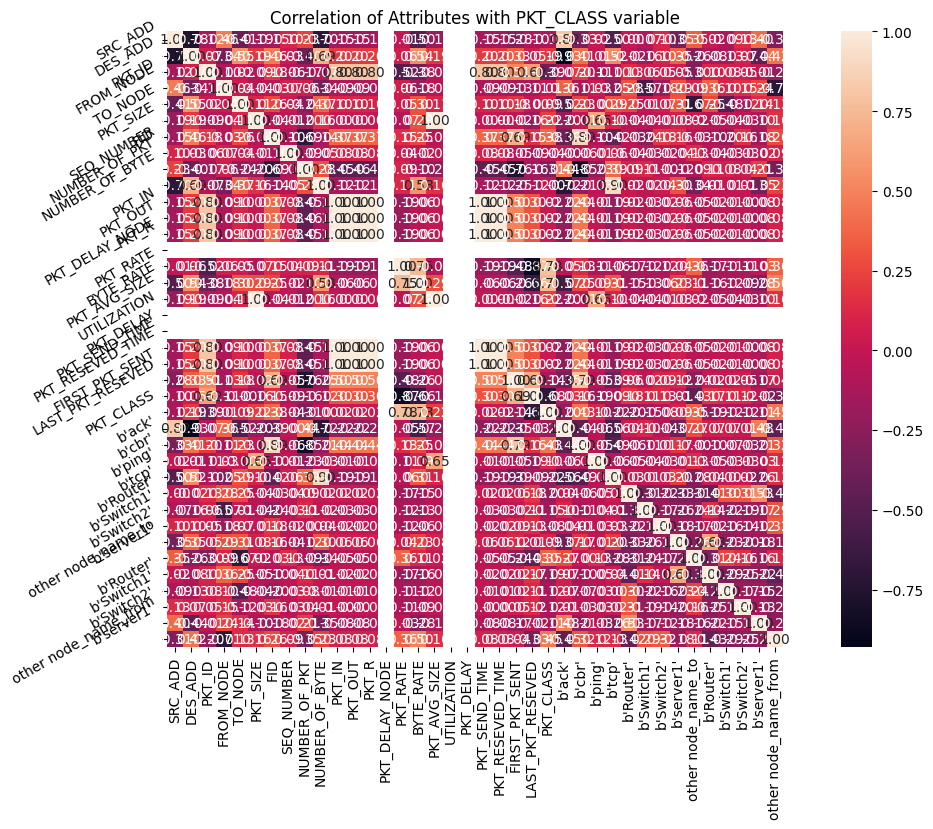

In [185]:
correlation = df.corr()


# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(15,8))
plt.title('Correlation of Attributes with PKT_CLASS variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [186]:
# Applying standardization
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

In [187]:
# Scaling all columns aside from the target class
scaler.fit(df.drop('PKT_CLASS', axis =1))

StandardScaler()

In [188]:
scaled_features = scaler.transform(df.drop('PKT_CLASS', axis =1))

In [189]:
# Viewing the scaled data
scaled_features

array([[ 1.15822101, -0.88329767, -1.46686742, ..., -0.38826278,
        -0.34251779, -0.65465367],
       [-1.44160169,  0.67370161, -0.59813549, ..., -0.38826278,
        -0.34251779,  1.52752523],
       [ 0.09465718,  0.67370161,  1.29322334, ..., -0.38826278,
        -0.34251779, -0.65465367],
       ...,
       [-1.20525417,  0.67370161,  0.40516104, ..., -0.38826278,
        -0.34251779,  1.52752523],
       [-0.96890665,  0.67370161,  0.90671263, ..., -0.38826278,
        -0.34251779, -0.65465367],
       [-1.55977545,  0.67370161,  0.67383231, ..., -0.38826278,
        -0.34251779, -0.65465367]])

In [190]:
# Creating a dataframe from the scaled features
df_scaled = pd.DataFrame(scaled_features, columns = df.columns[:-1])

In [191]:
# Viewing scaled df
df_scaled.head()

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_SIZE,FID,SEQ_NUMBER,NUMBER_OF_PKT,NUMBER_OF_BYTE,...,b'tcp',b'Router',b'Switch1',b'Switch2',b'server1',other node_name_to,b'Router',b'Switch1',b'Switch2',b'server1'
0,1.158221,-0.883298,-1.466867,0.546601,0.205615,-0.283152,-0.219273,-0.117926,0.646599,-1.017094,...,-0.634448,-0.495308,2.859075,-0.52179,-0.489037,1.531170,-0.444528,-0.388263,-0.342518,-0.654654
1,-1.441602,0.673702,-0.598135,-2.855480,0.013092,0.106961,-1.018893,-0.075066,0.643904,1.257492,...,-0.634448,2.018946,-0.349763,-0.52179,-0.489037,-0.653095,-0.444528,-0.388263,-0.342518,1.527525
2,0.094657,0.673702,1.293223,0.546601,0.590663,0.106961,0.136113,0.003430,0.644129,1.257645,...,-0.634448,-0.495308,-0.349763,1.91648,-0.489037,1.531170,-0.444528,-0.388263,-0.342518,-0.654654
3,-1.559775,0.673702,-1.404104,0.222593,0.398139,0.096453,0.669193,-0.113362,-0.924067,0.199126,...,-0.634448,-0.495308,-0.349763,-0.52179,2.044834,-0.653095,-0.444528,-0.388263,-0.342518,1.527525
4,-1.323428,0.673702,1.438214,0.546601,0.590663,-0.034898,0.846886,-0.093957,-1.565806,-0.506446,...,-0.634448,-0.495308,-0.349763,1.91648,-0.489037,1.531170,-0.444528,-0.388263,-0.342518,-0.654654


#### Step 7: Selecting X features and Y target Variables



In [192]:
from sklearn.model_selection import train_test_split

In [193]:
X = df_scaled.drop('PKT_CLASS', axis =1)
y = df['PKT_CLASS']

In [194]:
# We split the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

## Task 4: Performing KNN

#### Step 1: Define a K-Nearest Neighbors (KNN) classifier with **k = 3** initially


In [195]:
from sklearn.neighbors import KNeighborsClassifier

In [196]:
# Defining KNN model with N = 3
knn = KNeighborsClassifier(n_neighbors = 3)

#### Step 2: Fit a K-Nearest Neighbors (KNN) classifier to the training data

In [197]:
# Fitting the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

#### Step 3: Use the trained model to predict network traffic class labels on the test set

In [198]:
# Making predictions on the test data
pred = knn.predict(X_test)

In [199]:
# Viewing the prediction
pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

#### Step 4: Analyze the model's performance using accuracy score, classification report, and confusion matrix

In [200]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [201]:
# Getting the confusion matrix 
print(confusion_matrix(y_test,pred))

[[269   0]
 [  2  29]]


In [202]:
# Analyzing the classification report 
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       269
           1       1.00      0.94      0.97        31

    accuracy                           0.99       300
   macro avg       1.00      0.97      0.98       300
weighted avg       0.99      0.99      0.99       300



In [203]:
# Getting the accuracy
print(f"Accuracy: {accuracy_score(y_test, pred)*100}%")

Accuracy: 99.33333333333333%


In [204]:
# Getting the error rate
print(f"Error Rate: {np.mean(pred!= y_test)}")

Error Rate: 0.006666666666666667


#### Step 5: Compare results for different values of **k** to find the optimal number of neighbors


In [205]:
# Calculating how error varies with the value of K
error_rate = []
accuracy = []
for i in range (1,30,2):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred= knn.predict(X_test)
    error =np.mean(pred != y_test)
    error_rate.append(error)
    acc = accuracy_score(y_test, pred)
    accuracy.append(acc)
    print(f"For k = {i}:\nError Rate = {error} \nAccuracy = {acc*100}%\n")

For k = 1:
Error Rate = 0.01 
Accuracy = 99.0%

For k = 3:
Error Rate = 0.006666666666666667 
Accuracy = 99.33333333333333%

For k = 5:
Error Rate = 0.006666666666666667 
Accuracy = 99.33333333333333%

For k = 7:
Error Rate = 0.006666666666666667 
Accuracy = 99.33333333333333%

For k = 9:
Error Rate = 0.006666666666666667 
Accuracy = 99.33333333333333%

For k = 11:
Error Rate = 0.016666666666666666 
Accuracy = 98.33333333333333%

For k = 13:
Error Rate = 0.02 
Accuracy = 98.0%

For k = 15:
Error Rate = 0.02 
Accuracy = 98.0%

For k = 17:
Error Rate = 0.023333333333333334 
Accuracy = 97.66666666666667%

For k = 19:
Error Rate = 0.03 
Accuracy = 97.0%

For k = 21:
Error Rate = 0.03 
Accuracy = 97.0%

For k = 23:
Error Rate = 0.02666666666666667 
Accuracy = 97.33333333333334%

For k = 25:
Error Rate = 0.03 
Accuracy = 97.0%

For k = 27:
Error Rate = 0.03 
Accuracy = 97.0%

For k = 29:
Error Rate = 0.03 
Accuracy = 97.0%



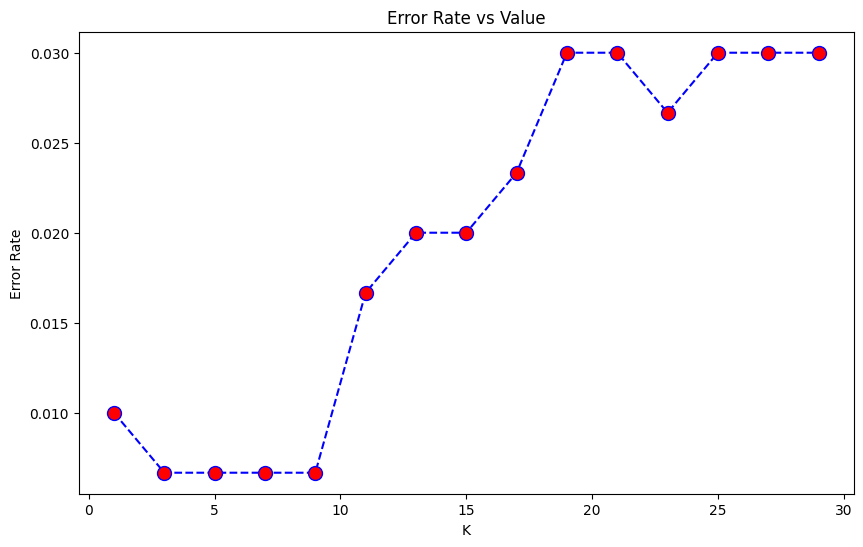

In [206]:
# Plotting the relationship between error and K
plt.figure(figsize=(10,6))
plt.plot(range(1, 30,2), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

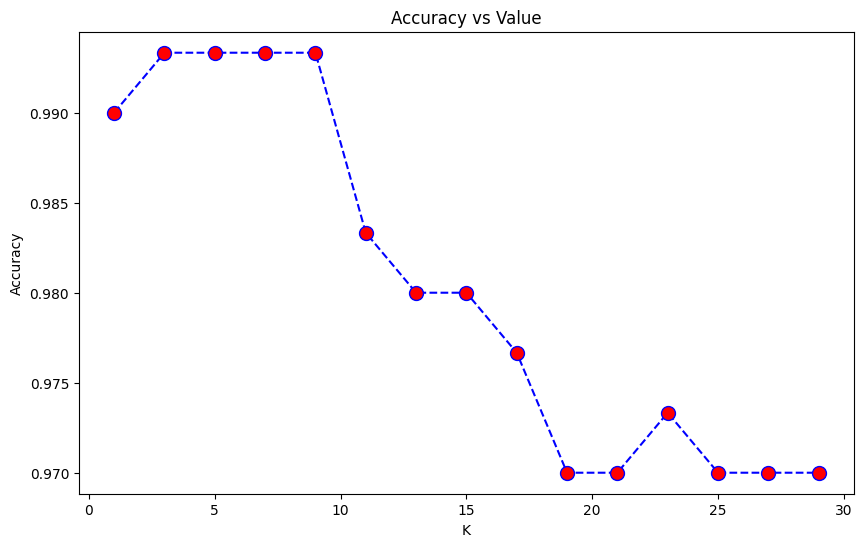

In [207]:
# Plotting the relationship between accuracy and K
plt.figure(figsize=(10,6))
plt.plot(range(1, 30,2), accuracy, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy vs Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

#### Step 6: Analyzing the Results

After evaluating the k-NN model for different values of k, we observed the following:

- The highest accuracy of **99.33%** was consistently achieved at **k = 3, 5, 7, and 9**.
- The lowest error rate of **0.0067** also occurred at these values of k.
- Beyond k = 9, the accuracy started to decrease.

As a result we would select **k = 3** as the optimal value because:
- It provides the highest classification performance.
- The confusion matrix confirms that both classes Normal and Threat are being predicted with high precision and recall, especially for the minority class (Threat).
